In [2]:
# import usefull packages and libraries
import shap
import joblib
import pandas as pd
import numpy as np
import random

In [3]:
# load the best model for interpratation
model=joblib.load(r"C:/Users\user\Desktop\tasks\Fraud-Detection-AI\models\best_rf_model.joblib")
test_df=pd.read_csv(r"C:\Users\user\Desktop\tasks\Fraud-Detection-AI\data\processed\X_fd_test_task-3.csv")

In [4]:
test_df.head()

,purchase_value,source,browser,sex,age,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,time_since_signup,signup_to_purchase,signup_hour,signup_day,purchase_hour,purchase_day
0,67,0,0,1,19,81,1,0.0,18,2,269.812500,971325.0,12,5,18,2
1,81,2,0,1,38,92,1,0.0,15,4,549.301667,1977486.0,18,2,15,4
2,50,0,2,1,28,139,1,0.0,1,0,0.000278,1.0,1,0,1,0
3,31,0,2,1,23,81,1,0.0,16,3,1174.931944,4229755.0,18,3,16,3
4,19,0,2,0,28,22,1,0.0,9,1,2559.109167,9212793.0,17,6,9,1


In [6]:
# initilize the shap to get shap_values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_df, check_additivity=False)

In [10]:
shap_values

array([[[-3.03171535e-03,  3.03171535e-03],
        [-6.19296278e-03,  6.19296278e-03],
        [ 5.70364136e-05, -5.70364136e-05],
        ...,
        [ 2.84437256e-04, -2.84437256e-04],
        [ 7.66927589e-03, -7.66927589e-03],
        [ 8.05032168e-04, -8.05032168e-04]],

       [[-2.95393039e-03,  2.95393039e-03],
        [-1.36648224e-02,  1.36648224e-02],
        [-2.02171299e-03,  2.02171299e-03],
        ...,
        [-1.57859316e-03,  1.57859316e-03],
        [ 8.08462623e-03, -8.08462623e-03],
        [ 1.09348514e-04, -1.09348514e-04]],

       [[-1.59953603e-03,  1.59953603e-03],
        [-3.03924450e-02,  3.03924450e-02],
        [-9.39231518e-03,  9.39231518e-03],
        ...,
        [ 2.56564894e-04, -2.56564894e-04],
        [ 5.69361438e-03, -5.69361438e-03],
        [ 2.64610202e-03, -2.64610202e-03]],

       ...,

       [[-2.23989138e-03,  2.23989138e-03],
        [-7.29700118e-03,  7.29700118e-03],
        [-1.06647577e-03,  1.06647577e-03],
        ...,
     

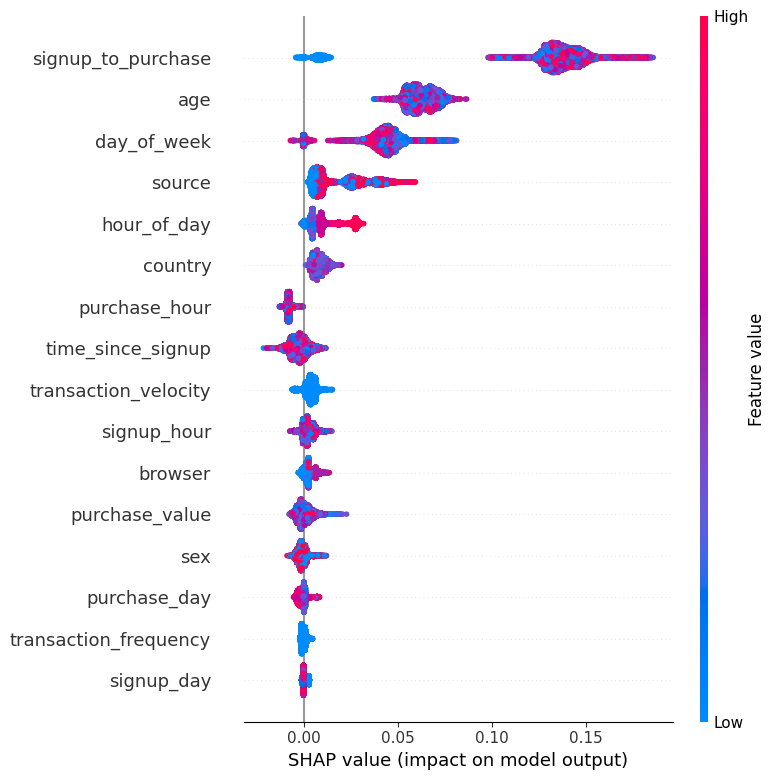

In [11]:
# Global Interpretability: SHAP Summary Plot
shap.summary_plot(shap_values[:, :, 1], test_df)

In [ ]:
X_summary = test_df.sample(16, random_state=42)
shap_values = explainer.shap_values(X_summary, check_additivity=False)

# i must be in range [0, 15]
i = np.random.randint(0, 16)

# Plot from the 16-sample summary
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][i],
    X_summary.iloc[[i]]
)